# Anomaly Detection in Android Smartphones (without root access)

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot
import matplotlib as plt

from datetime import datetime

#### Upload via dropbox

In [135]:
url = 'https://www.dropbox.com/s/ilgw0ivqtu8beba/t4_mor.csv?dl=1'
df = pd.read_csv(url)

OverflowError: signed integer is greater than maximum

#### Upload files locally

In [4]:
df = pd.read_csv("/home/jovyan/SherLock/csvs/t4_mor_head.csv")

In [5]:
df['sessionTypeBinary'] = (df['sessionType'] == 'malicious').astype('int')

In [6]:
# drop the duplicates, if any
def drop_rows(df):
    org_df_len = len(df)
    df = df.drop_duplicates()
    df = df.dropna(axis = 0)
    new_df_len = len(df)
    rows_dropped = (org_df_len - new_df_len)
    print(f'Rows dropped: {rows_dropped}')
    return df

In [7]:
df.sessionType.value_counts()

malicious    28013
benign       21936
Name: sessionType, dtype: int64

In [8]:
df = drop_rows(df)

Rows dropped: 8090


In [9]:
dates = plt.dates.date2num(df.Traffic_timestamp)

In [48]:
dates

array([16801.09617701, 16801.0964549 , 16801.09720199, ...,
       16832.95325752, 16832.95342958, 16832.95451787])

In [10]:
df['Total_CPU'].values

array([11.764706,  0.      , 51.277946, ..., 25.3526  , 21.130953,
        0.      ])

In [12]:
colors = {'malicious': 'red', 'benign':'green'}

In [13]:
df['sessionType'].map(colors)

50         red
51         red
52         red
53         red
55         red
         ...  
49462    green
49463    green
49464    green
49465    green
49466    green
Name: sessionType, Length: 41909, dtype: object

In [14]:
df['dates'] = dates

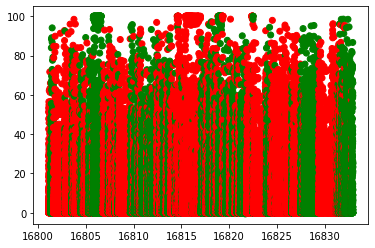

In [15]:
colors = {'malicious': 'red', 'benign':'green'}
plt.pyplot.scatter(dates, df['Total_CPU'].values, c=df['sessionType'].map(colors))

In [18]:
df['userid'].value_counts().index[0]

'73e9841e35'

In [19]:
df_1user = df[df['userid'] == df['userid'].value_counts().index[0]]

In [26]:
df_sorted = df.set_index('uuid').sort_index(axis=0, ascending=True)

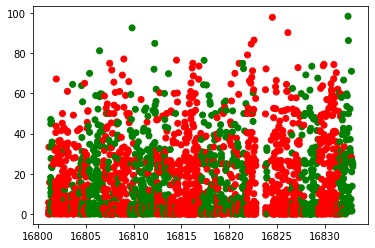

In [20]:
plt.pyplot.scatter(plt.dates.date2num(df_1user.Traffic_timestamp), df_1user['Total_CPU'].values, c=df_1user['sessionType'].map(colors))

### Let's check the average usage statistics in a malicious session vs a benign session 

In [112]:
pd.set_option('display.max_columns', None)
avgs = df_1user.groupby('sessionType').agg('mean')
avgs.to_csv("avgs.csv")

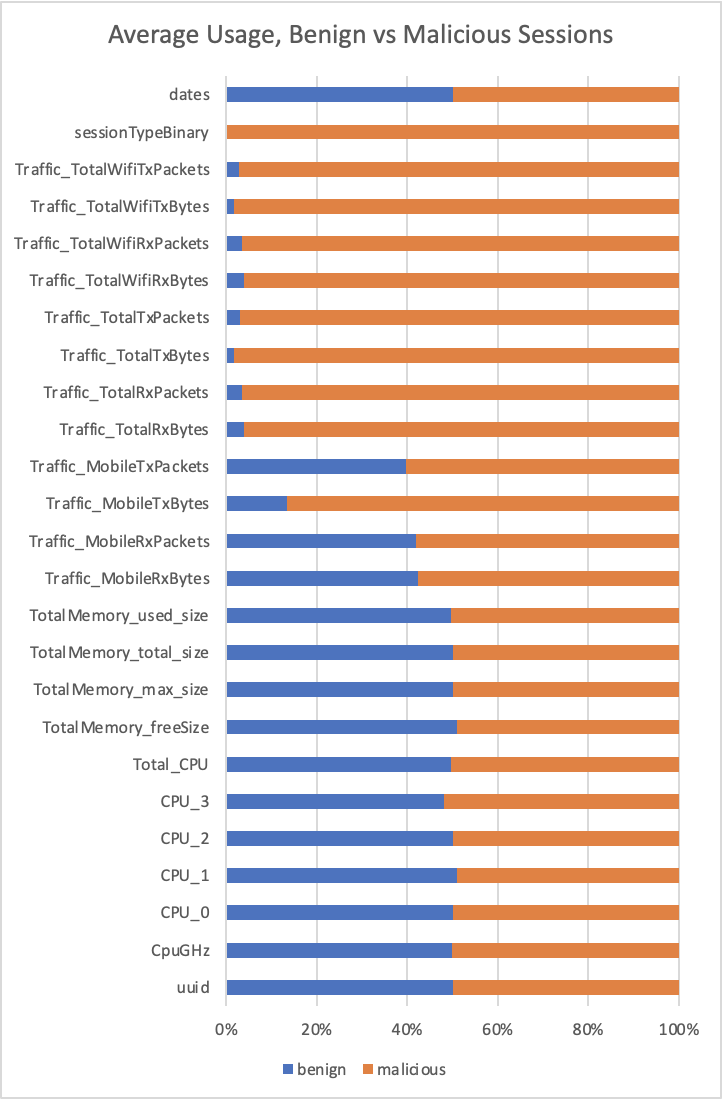 

In [22]:
pd.set_option('display.max_columns', None)
avgs = df_1user.groupby('sessionType').agg('mean').where(df_1user['Traffic_MobileRxBytes'] != 0)
avgs.to_csv("avgs.csv")

In [23]:
avgs.iloc[0]

uuid                         NaN
CpuGHz                       NaN
CPU_0                        NaN
CPU_1                        NaN
CPU_2                        NaN
CPU_3                        NaN
Total_CPU                    NaN
TotalMemory_freeSize         NaN
TotalMemory_max_size         NaN
TotalMemory_total_size       NaN
TotalMemory_used_size        NaN
Traffic_MobileRxBytes        NaN
Traffic_MobileRxPackets      NaN
Traffic_MobileTxBytes        NaN
Traffic_MobileTxPackets      NaN
Traffic_TotalRxBytes         NaN
Traffic_TotalRxPackets       NaN
Traffic_TotalTxBytes         NaN
Traffic_TotalTxPackets       NaN
Traffic_TotalWifiRxBytes     NaN
Traffic_TotalWifiRxPackets   NaN
Traffic_TotalWifiTxBytes     NaN
Traffic_TotalWifiTxPackets   NaN
sessionTypeBinary            NaN
dates                        NaN
Name: benign, dtype: float64

In [24]:
[avgs.columns]

[Index(['uuid', 'CpuGHz', 'CPU_0', 'CPU_1', 'CPU_2', 'CPU_3', 'Total_CPU',
        'TotalMemory_freeSize', 'TotalMemory_max_size',
        'TotalMemory_total_size', 'TotalMemory_used_size',
        'Traffic_MobileRxBytes', 'Traffic_MobileRxPackets',
        'Traffic_MobileTxBytes', 'Traffic_MobileTxPackets',
        'Traffic_TotalRxBytes', 'Traffic_TotalRxPackets',
        'Traffic_TotalTxBytes', 'Traffic_TotalTxPackets',
        'Traffic_TotalWifiRxBytes', 'Traffic_TotalWifiRxPackets',
        'Traffic_TotalWifiTxBytes', 'Traffic_TotalWifiTxPackets',
        'sessionTypeBinary', 'dates'],
       dtype='object')]

### Plot the differences in 

In [42]:
df = df.sort_values('uuid')

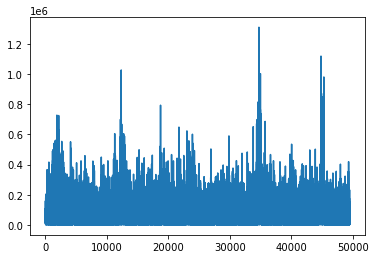

In [44]:
plt.pyplot.plot(df.uuid.diff())

In [53]:
np.nanmax(df.uuid.diff()) - np.nanmin(df.uuid.diff())

0.0

In [54]:
df.head()

,uuid,sessionType,userid,Version,CpuGHz,CPU_0,CPU_1,CPU_2,CPU_3,Total_CPU,TotalMemory_freeSize,TotalMemory_max_size,TotalMemory_total_size,TotalMemory_used_size,Traffic_MobileRxBytes,Traffic_MobileRxPackets,Traffic_MobileTxBytes,Traffic_MobileTxPackets,Traffic_TotalRxBytes,Traffic_TotalRxPackets,Traffic_TotalTxBytes,Traffic_TotalTxPackets,Traffic_TotalWifiRxBytes,Traffic_TotalWifiRxPackets,Traffic_TotalWifiTxBytes,Traffic_TotalWifiTxPackets,Traffic_timestamp,sessionTypeBinary,dates
50,1451607509800,malicious,860550d355,2.0,1.7,47.058823,0.000000,0.000000,0.000000,11.764706,3115692.0,134217728.0,31498476.0,28382784.0,0.0,0.0,0.0,0.0,36.0,1.0,0.0,0.0,36.0,1.0,0.0,0.0,2016-01-01 02:18:29.694,1,16801.096177
51,1451607533848,malicious,dd25a68e9e,2.0,1.7,0.000000,0.000000,0.000000,0.000000,0.000000,6270454.0,134217728.0,32418316.0,26147862.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 02:18:53.703,1,16801.096455
52,1451607599040,malicious,e0bf6beeb3,2.0,1.1,38.888890,94.117645,42.105263,30.000002,51.277946,21101624.0,134217728.0,37429248.0,16327624.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 02:19:58.252,1,16801.097202
53,1451607608967,malicious,dd25a68e9e,2.0,1.7,12.500000,33.333336,18.181818,52.941177,29.239082,1884012.0,134217728.0,29247714.0,27363702.0,0.0,0.0,0.0,0.0,5703.0,7.0,1067.0,11.0,5703.0,7.0,1067.0,11.0,2016-01-01 02:20:08.804,1,16801.097324
55,1451607768377,malicious,831b42eaa1,2.0,2.4,25.000000,0.000000,0.000000,0.000000,6.250000,9925150.0,134217728.0,31079016.0,21153866.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2016-01-01 02:22:48.256,1,16801.099170
